## Import Library & Read the Data

In [2]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df_ori = pd.read_csv("Global YouTube Statistics.csv", encoding='latin-1')

In [4]:
df_ori

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


## Cleaning Data

In [5]:
df_ori.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

<Axes: >

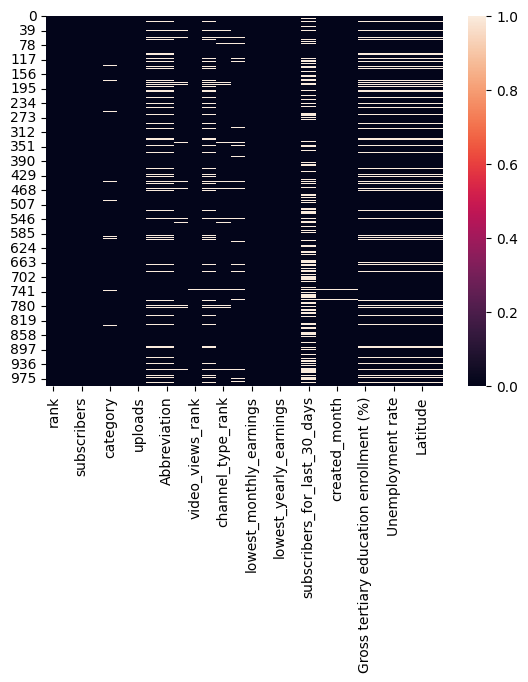

In [6]:
sns.heatmap(df_ori.isna())

Perhatikan bahwa pada kolom subcribers for last 30 days sangat banyak kolom yg null, sedangkan juga terdapat beberapa kolom lainnya yang memiliki jumlah null yang lumayan banyak. Untuk mengatasinya kita perlu gunakan feature engineering

In [7]:
# Buang columns yang sekiranya tidak akan digunakan
df = df_ori.drop(columns = ['Abbreviation', 'Latitude', 'Longitude', 'Urban_population','Population'])
df1 = df.copy()

In [8]:
df1.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiar

In [9]:
# Atasi NaN pada Category dengan mengubah nilainya menjadi "Null"
df1['category'] = df1['category'].fillna('Null')

# Country NaN -> Null
df1['Country'] = df1['Country'].fillna('Null')

# channel_type Nan -> Null
df1['channel_type'] = df1['channel_type'].fillna('Null')

# video_views_rank, channel_type_rank, country_rank Nan -> 0, Boleh ke 0 karena min-nya 1 dan jumlahnya sedikit
df1['video_views_rank'] = df1['video_views_rank'].fillna(0)
df1['channel_type_rank'] = df1['channel_type_rank'].fillna(0) 
df1['country_rank'] = df1['country_rank'].fillna(0)

# subscribers_for_last_30_days NaN -> 0, Boleh ke 0 karena min-nya 1 dan jumlahnya sedikit
df1['subscribers_for_last_30_days'] = df1['subscribers_for_last_30_days'].fillna(0)

# video_views_for_the_last_30_days NaN -> 0, Boleh ke 0 karena min-nya 1 dan jumlahnya sedikit
df1['video_views_for_the_last_30_days'] = df1['video_views_for_the_last_30_days'].fillna(0)

# Unemployee rate, Gross Nan -> 0, Boleh ke 0 karena min-nya 1 dan jumlahnya sedikit
df1['Unemployment rate'] = df1['Unemployment rate'].fillna(0)
df1['Gross tertiary education enrollment (%)'] = df1['Gross tertiary education enrollment (%)'].fillna(0)


In [10]:
# Mencari data yang tidak memiliki tanggal, bulan, dan tahun pembuatan
df1[df1[['created_year', 'created_month', 'created_date']].isnull().any(axis=1)]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Unemployment rate
236,237,Chris Brown,25200000,1.552057e+10,Music,ChrisBrown,0,Null,Null,3612215.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.00
468,469,Good Mythical Morning,18300000,8.798045e+09,Entertainment,Goodmythicalmorning,0,Null,Null,3612215.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.00
508,509,The Game Theorists,17600000,3.752347e+09,Gaming,TheGameTheorists,0,Australia,Null,3612215.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,113.1,5.27
735,736,LEGENDA FUNK,14500000,2.440718e+09,Music,LegendaFUNK,0,Brazil,Music,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,51.3,12.08
762,763,Harry Styles,14400000,5.689224e+09,People & Blogs,harrystyles,0,United States,Games,4037956.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,88.2,14.70


Terlihat dari data di atas ternyata, 5 user dari ketiga kolom yang kosong adalah user yang sama. Selanjutnya, kita perlu alokasikan tahun pembuatannya menjadi 0 saja

In [11]:
""" Untuk 'created_year', 'created_month', 'created_date'
    diganti dengan tanggal pembuatan yaitu tanggal 02/09/2023"""
df1['created_year'] = df1['created_year'].fillna(2023)
df1['created_month'] = df1['created_month'].fillna('Sep')
df1['created_date'] = df1['created_date'].fillna(2)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 995 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  995 non-null    object 
 8   channel_type                             995 non-null    object 
 9   video_views_rank                         995 non-null    float64
 10  country_rank                             995 non-n

## Feature Engineering

In [13]:
def create_feature(df: pd.DataFrame) -> pd.DataFrame:
    # Gunakan variable lain agar data asli tidak terganti
    X = df.copy()

    # Change created_year, created_month, created_date format
    X['created_year'] = X['created_year'].astype(int)
    # X['created_month'] = X['created_month'].astype()
    X['created_date'] = X['created_date'].astype(int)

    # Membuat kolom baru untuk tanggal pembuatan channel
    X['created_channel'] = X[
        ['created_year', 'created_month','created_date']].astype(str).apply(lambda x: '/'.join(x),axis=1)
    X['created_channel'] = pd.to_datetime(X['created_channel'], format="%Y/%b/%d")

    # Membuat feature untuk account lifetime by tanggal 02/09/2023 (pembuatan hari ini)
    now = pd.to_datetime('2023/9/2', format="%Y/%m/%d")
    X['account_lifetime'] = (now - X['created_channel']).dt.days
    X['account_lifetime'] = (X['account_lifetime'] / 365).astype(int) #Ubah dalam hitungan tahun (365 days)

    return X

In [14]:
df2 = create_feature(df1)
df2.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Unemployment rate,created_channel,account_lifetime
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,6800000.00,1.084000e+08,2000000.0,2006,Mar,13,28.1,5.36,2006-03-13,17
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,Games,4055159.0,...,0.04,5.800000e-01,0.0,2006,Mar,5,88.2,14.70,2006-03-05,17
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,4000000.00,6.470000e+07,8000000.0,2012,Feb,20,88.2,14.70,2012-02-20,11
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,5900000.00,9.480000e+07,1000000.0,2006,Sep,1,88.2,14.70,2006-09-01,17
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,5500000.00,8.750000e+07,1000000.0,2006,Sep,20,28.1,5.36,2006-09-20,16


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   rank                                     995 non-null    int64         
 1   Youtuber                                 995 non-null    object        
 2   subscribers                              995 non-null    int64         
 3   video views                              995 non-null    float64       
 4   category                                 995 non-null    object        
 5   Title                                    995 non-null    object        
 6   uploads                                  995 non-null    int64         
 7   Country                                  995 non-null    object        
 8   channel_type                             995 non-null    object        
 9   video_views_rank                         99

## Exploratory Data Analysis

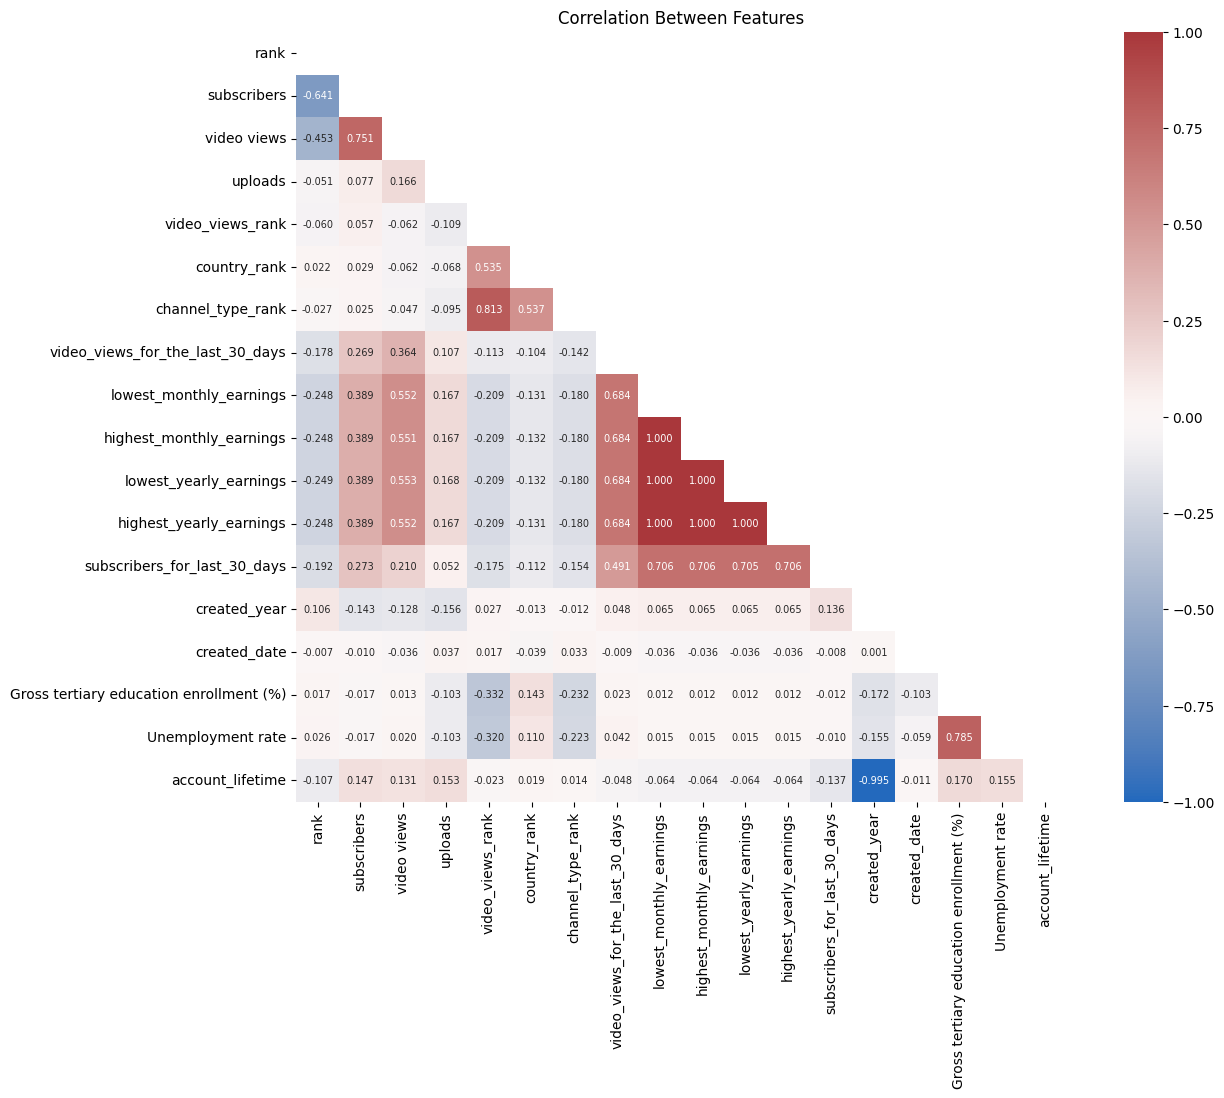

In [16]:
# Cek korelasti antar fitur dan buat relational mapping
corr_column = df2.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Features')

mask = np.triu(np.ones_like(
    df2[corr_column].corr(), dtype=np.bool_))

sns.heatmap(df2[corr_column].corr(),
            vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
            annot_kws = {'fontsize': 7, 'fontweight':'roman'},
            square=True)

plt.show()

In [17]:
rank_factor = ['subscribers', 'video views', 
                'uploads','video_views_for_the_last_30_days',
                'subscribers_for_last_30_days','created_year',
                'created_date','Gross tertiary education enrollment (%)',
                'Unemployment rate', 'account_lifetime']
rank_factor

['subscribers',
 'video views',
 'uploads',
 'video_views_for_the_last_30_days',
 'subscribers_for_last_30_days',
 'created_year',
 'created_date',
 'Gross tertiary education enrollment (%)',
 'Unemployment rate',
 'account_lifetime']

In [18]:
# Cari korelasi terbaik untuk meningkatkan ranking pada Youtube
corr_ranks = {}

for col in rank_factor:
    if col != 'rank':
        corr_rank = df2['rank'].corr(df2[col])
        corr_rank = 0 - corr_rank # Balikan nilai korelasi karena berbanding terbalik
        corr_ranks[col] = corr_rank

corr_rank_series = pd.Series(corr_ranks)

# Mengambil nilai korelasi terbesar
top = corr_rank_series.nlargest()

# Mengubah Series menjadi DataFrame
top_df = top.to_frame()

# Memberi nama kolom baru sebagai 'Correlation'
top_df.columns = ['Correlation']

# Menampilkan hasil dalam bentuk tabel dengan format dan warna tertentu
print("Top correlations:")
display(top_df.style.format("{:.2f}").background_gradient(cmap='vlag'))

Top correlations:


,Correlation
subscribers,0.64
video views,0.45
subscribers_for_last_30_days,0.19
video_views_for_the_last_30_days,0.18
account_lifetime,0.11


Berdasarkan tabel di atas, terlihat bahwa seorang youtuber di ranking berdasarkan jumlah subscribers dan video views

### Plot Distribution

<Axes: xlabel='account_lifetime', ylabel='Count'>

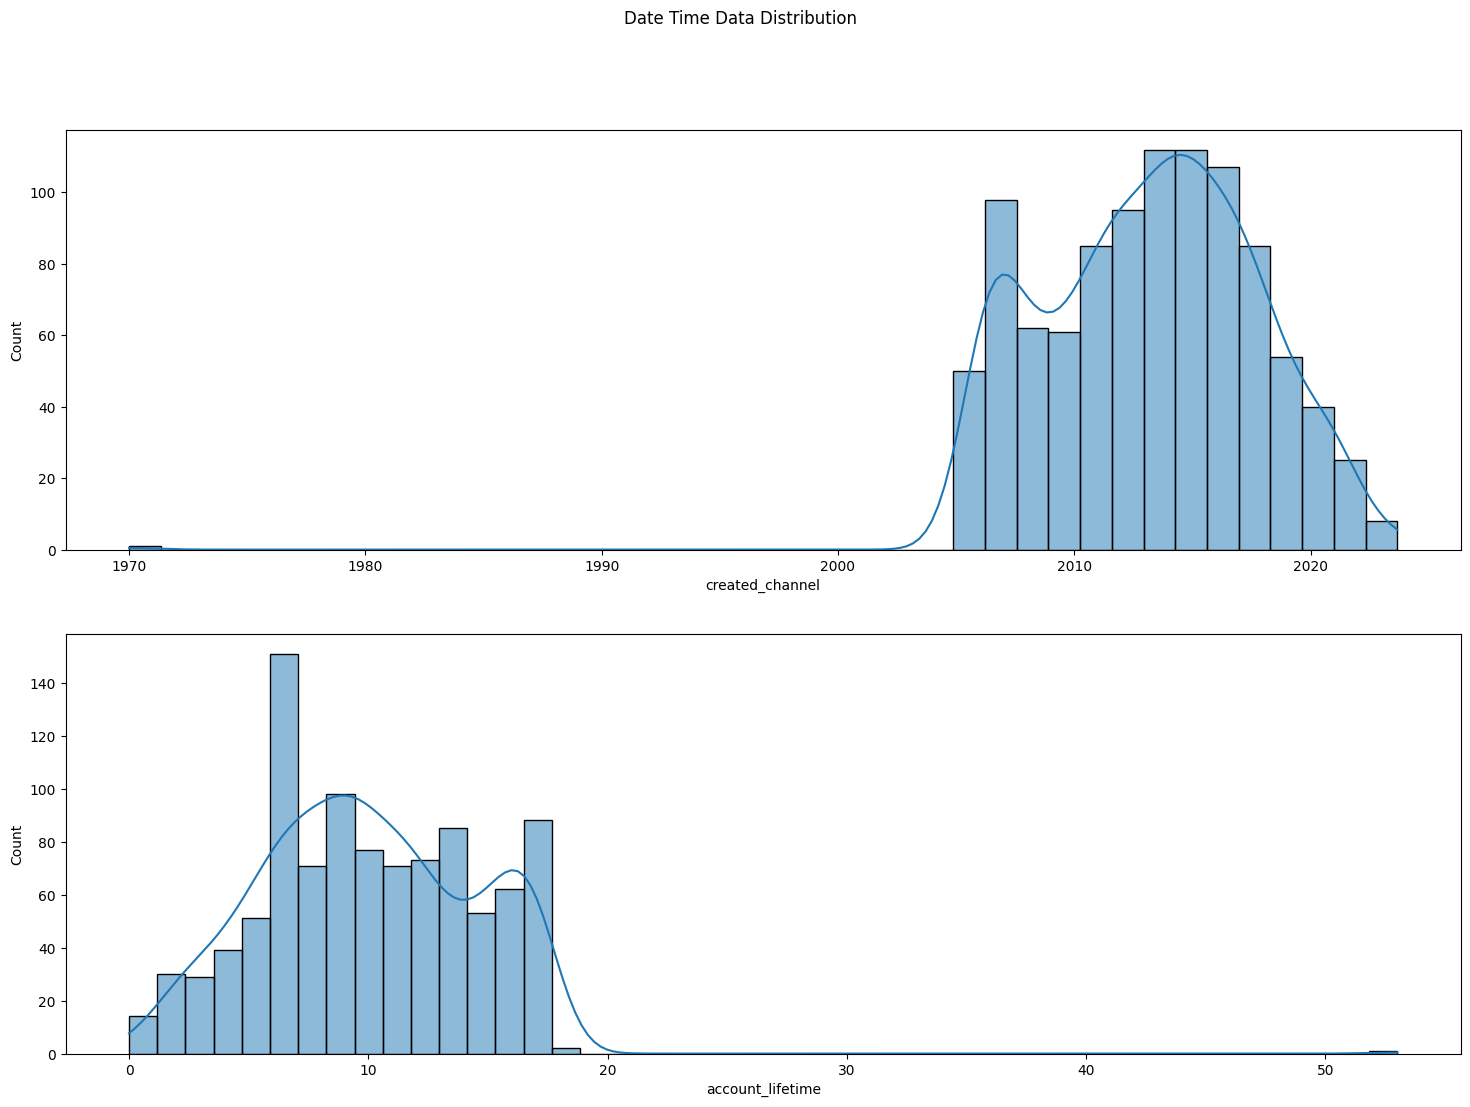

In [19]:
fig, axes = plt.subplots(2,1, figsize=(18,12))

fig.suptitle('Date Time Data Distribution')

sns.histplot(ax=axes[0], data=df2['created_channel'], kde=True)
sns.histplot(ax=axes[1], data=df2['account_lifetime'], kde=True)

In [20]:
# membuat visualisasi top 10 subscribers
top_10_subs = df2.nlargest(10,'subscribers')

fig1 = px.bar(top_10_subs, x = 'subscribers', y = 'Youtuber',
            orientation = 'h', text = 'subscribers', color = 'subscribers',
            labels = {'subscribers':'Subscribers (in billions)'},
            color_continuous_scale = 'Viridis')

fig1.update_traces(marker_line_color = 'rgb(8,48,107)', marker_line_width = 1.5,
                    opacity = 0.8, textposition='inside')

fig1.update_layout(title_text = 'Top 10 YouTube Channels by Subscribers',
                    yaxis_title = 'YouTube Channel',
                    xaxis_title = 'Subscribers (in billions)',
                    height = 500)

fig1.show()

Terlihat bahwa pada visualisasi di atas bahwa Youtube Channel yang memiliki subscribers tertinggi yaitu T-Series sebanyak 245M

In [21]:
# Sunburst chart for the distribution of channel types
fig2 = px.pie(df2, names = 'channel_type', color_discrete_map = px.colors.qualitative.Set1)

fig2.update_layout(title_text = 'Distribution of Youtube Channel Types', height = 500)

fig2.show()

Berdasarkan pie chart di atas terlihat bahwa Entertainment

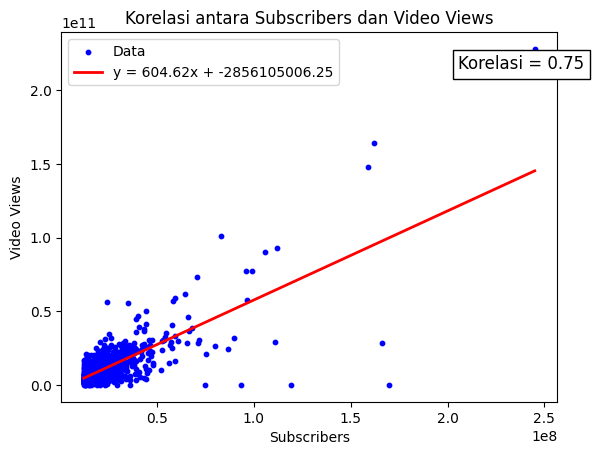

In [22]:
# Membuat scatter plot dengan subscribers sebagai sumbu x dan video views sebagai sumbu y
plt.scatter(df2['subscribers'], df2['video views'], 
            color='blue', # memberi warna biru pada titik-titik data
            s=10, # memberi ukuran 10 pada titik-titik data
            label='Data') # memberi label 'Data' pada titik-titik data

# Menghitung nilai korelasi antara subscribers dan video views
corr = df2['subscribers'].corr(df2['video views'])

# Mendapatkan persamaan garis regresi linear dari subscribers dan video views
m, b = np.polyfit(df2['subscribers'], df2['video views'], 1) # m adalah koefisien kemiringan, b adalah konstanta
f = np.poly1d((m, b)) # f adalah fungsi yang menghasilkan nilai y dari x

# Menambahkan garis regresi linear pada scatter plot dengan plt.plot()
plt.plot(df2['subscribers'], f(df2['subscribers']), 
         color='red', # memberi warna merah pada garis
         linewidth=2, # memberi ketebalan 2 pada garis
         label=f'y = {m:.2f}x + {b:.2f}'
         ) # memberi label persamaan garis pada garis

# Menambahkan judul pada grafik
plt.title('Korelasi antara Subscribers dan Video Views')

# Menambahkan label pada sumbu x
plt.xlabel('Subscribers')

# Menambahkan label pada sumbu y
plt.ylabel('Video Views')

# Menampilkan legenda pada grafik
plt.legend()

# Menambahkan anotasi yang menunjukkan nilai korelasi pada grafik
plt.annotate(f'Korelasi = {corr:.2f}', # teks yang akan ditampilkan
             xy=(0.8, 0.9), # posisi teks relatif terhadap ukuran grafik
             xycoords='axes fraction', # koordinat teks berdasarkan fraksi dari sumbu
             fontsize=12, # ukuran font teks
             bbox=dict(facecolor='white', edgecolor='black')) # kotak yang mengelilingi teks

plt.show()

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   rank                                     995 non-null    int64         
 1   Youtuber                                 995 non-null    object        
 2   subscribers                              995 non-null    int64         
 3   video views                              995 non-null    float64       
 4   category                                 995 non-null    object        
 5   Title                                    995 non-null    object        
 6   uploads                                  995 non-null    int64         
 7   Country                                  995 non-null    object        
 8   channel_type                             995 non-null    object        
 9   video_views_rank                         99

In [24]:
# membuat data jumlah subscriber untuk tiap channel_type:
total_subscriber_per_channel_type = {}

for index, row in df2.iterrows():
    if row['channel_type'] not in total_subscriber_per_channel_type:
        total_subscriber_per_channel_type[row['channel_type']] = 0
    total_subscriber_per_channel_type[row['channel_type']] += row['subscribers']

# Membuat dataframe dari dictionary dengan index 'Channel Type' dan columns 'Total Subscriber'
total_subs_channel = pd.DataFrame(total_subscriber_per_channel_type.items(), columns = ['Channel Type','Total Subscriber'])
# Mengurutkan dataframe berdasarkan Total Subscriber dari yang terbanyak ke yang paling sedikit
total_subs_channel = total_subs_channel.sort_values("Total Subscriber", ascending=False)
total_subs_channel['Total Subscriber (in Billion)'] = total_subs_channel['Total Subscriber']/(10**9)

# Menambahkan parameter category_orders untuk menentukan urutan kategori di sumbu x
fig3 = px.bar(total_subs_channel, y = 'Total Subscriber', x = 'Channel Type',
            orientation = 'v', text = 'Total Subscriber (in Billion)', color = 'Total Subscriber',
            color_continuous_scale = 'Viridis', category_orders={"Channel Type": total_subs_channel["Channel Type"].tolist()})

fig3.update_traces(marker_line_color = 'rgb(8,48,107)', marker_line_width = 1.5,
                    opacity = 0.8, textposition='outside')

fig3.update_layout(title_text = 'Persebaran Subscriber untuk Tiap YouTube Channel',
                    xaxis_title = 'YouTube Channel',
                    yaxis_title = 'Subscribers (in billions)',
                    height = 600)

fig3.show()

In [25]:
# membuat data jumlah youtuber untuk tiap country
# Mengelompokkan data berdasarkan country dan menghitung jumlah youtuber
total_youtuber_country = df2.groupby("Country")["Youtuber"].count().reset_index()
# Mengubah nama kolom
total_youtuber_country.columns = ["Country", "Total Youtuber"]
# Mengurutkan dataframe berdasarkan Total Youtuber dari yang terbanyak ke yang paling sedikit secara langsung
total_youtuber_country.sort_values("Total Youtuber", ascending=False, inplace=True)

top_youtuber_country = total_youtuber_country.nlargest(15,'Total Youtuber')

# Menambahkan parameter category_orders untuk menentukan urutan kategori di sumbu x
fig4 = px.bar(top_youtuber_country, x = "Total Youtuber", y = "Country",
            orientation = 'h', text = "Total Youtuber", color = "Total Youtuber",
            color_continuous_scale = "Viridis", category_orders={"Country": top_youtuber_country["Country"].tolist()})

fig4.update_traces(marker_line_color = 'rgb(8,48,107)', marker_line_width = 1.5,
                    opacity = 0.8, textposition='outside')

fig4.update_layout(title_text = 'Total YouTubers per Each Country',
                    xaxis_title = 'Number of YouTuber',
                    yaxis_title = 'Country',
                    height = 600)

fig4.show()

C:\Users\user\AppData\Local\Temp\ipykernel_25404\2728437660.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



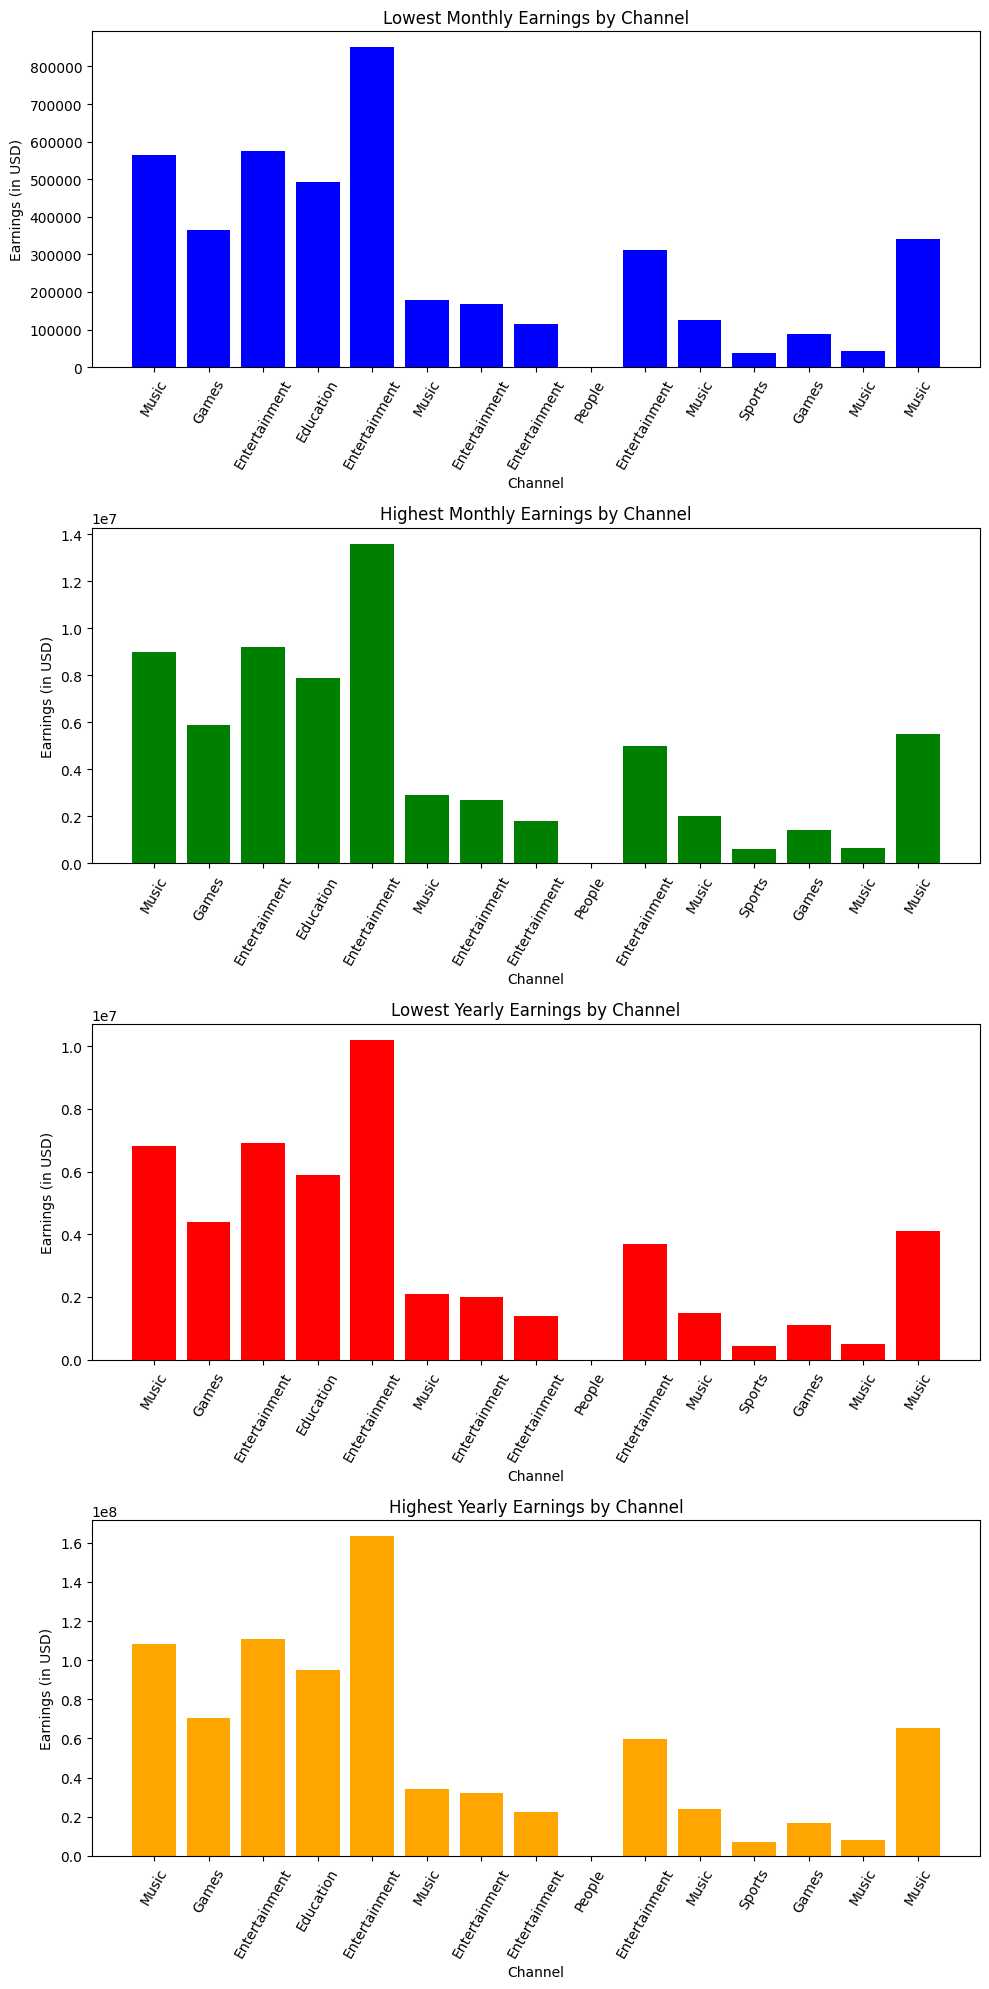

In [26]:
# Membuat gambar dan sumbu dengan ukuran 10 x 10 dan layout 2 x 2
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
# Membuat list nama kolom earnings
earnings = ["lowest_monthly_earnings", "highest_monthly_earnings", "lowest_yearly_earnings", "highest_yearly_earnings"]
# Membuat list warna untuk bar plot
colors = ["blue", "green", "red", "orange"]
# Membuat list judul untuk bar plot
titles = ["Lowest Monthly Earnings by Channel", "Highest Monthly Earnings by Channel", "Lowest Yearly Earnings by Channel", "Highest Yearly Earnings by Channel"]
# Menggunakan list comprehension untuk membuat bar plot pada setiap sumbu
[axes[i].bar(df2["channel_type"], df2[earnings[i]], color=colors[i]) for i in range(4)]
# Menggunakan list comprehension untuk menambahkan judul dan label sumbu pada setiap sumbu
[axes[i].set_title(titles[i]) for i in range(4)]
[axes[i].set_xlabel("Channel") for i in range(4)]
[axes[i].set_ylabel("Earnings (in USD)") for i in range(4)]
# Menggunakan list comprehension untuk memiringkan label x menjadi 60 derajat pada setiap sumbu
[axes[i].set_xticklabels(df2["channel_type"], rotation=60) for i in range(4)]
# Menyesuaikan jarak antara subplot
fig.tight_layout()
# Menampilkan gambar
plt.show()

In [27]:
earnings_columns = ['lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']
earnings_df = df2[earnings_columns]
fig5 = px.box(earnings_df, title='Distribution of Earnings',
              labels={'variable': 'Earnings', 'value': 'Earnings (in USD)'})
fig5.update_layout(height=1000)
fig5.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Earning monthly per each channel')

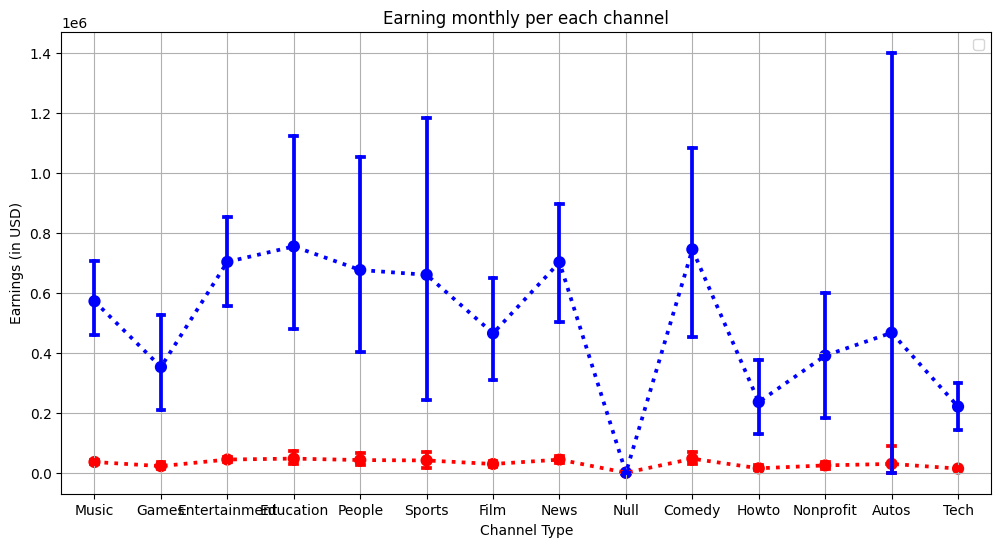

In [58]:
# Membuat point plot dengan x = 'channel_type' dan y = 'Monthly_earnings'
df2_animal = df2[df2['channel_type'] != 'Animals']
fig, ax = plt.subplots(figsize = (12,6))
ax = [
    sns.pointplot(data=df2_animal, x='channel_type', y='lowest_monthly_earnings', linestyles='dotted', capsize=0.1, color='red'),
    sns.pointplot(data=df2_animal, x='channel_type', y='highest_monthly_earnings', linestyles='dotted', capsize=0.1, color='blue')
    # sns.pointplot(data=df2, x='channel_type', y='lowest_yearly_earnings', linestyles='dotted', capsize=0.1, color='green')
    # sns.pointplot(data=df2, x='channel_type', y='highest_yearly_earnings', linestyles='dotted', capsize=0.1, color='yellow')
]
plt.grid()
plt.legend()
plt.ylabel('Earnings (in USD)')
plt.xlabel('Channel Type')
plt.title('Earning monthly per each channel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Earning yearly per each channel')

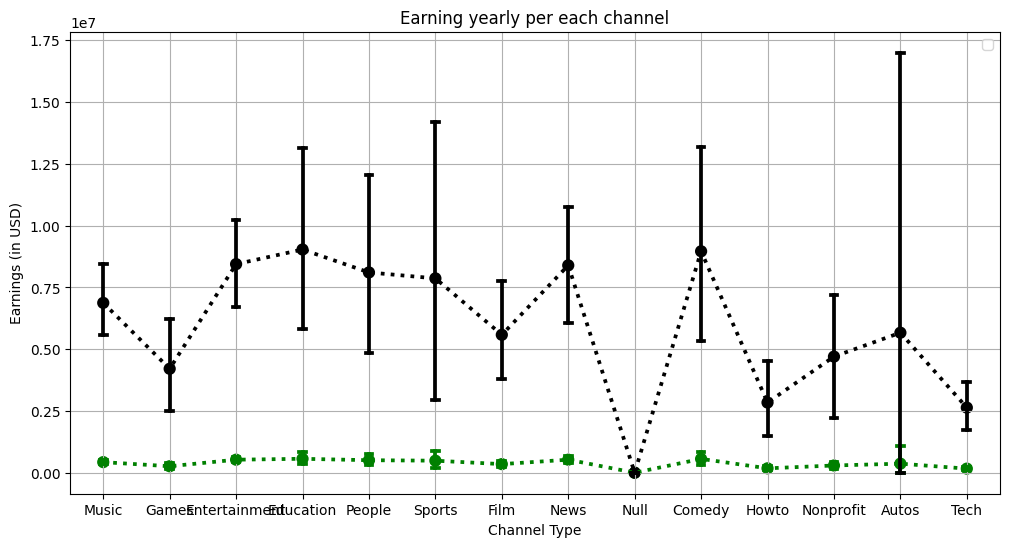

In [52]:
# Membuat point plot dengan x = 'channel_type' dan y = 'Yearly_earnings'
df2_animal = df2[df2['channel_type'] != 'Animals']
fig, ax = plt.subplots(figsize = (12,6))
ax = [
    # sns.pointplot(data=df2, x='channel_type', y='lowest_monthly_earnings', linestyles='dotted', capsize=0.1, color='red'),
    # sns.pointplot(data=df2, x='channel_type', y='highest_monthly_earnings', linestyles='dotted', capsize=0.1, color='blue')
    sns.pointplot(data=df2_animal, x='channel_type', y='lowest_yearly_earnings', linestyles='dotted', capsize=0.1, color='green'),
    sns.pointplot(data=df2_animal, x='channel_type', y='highest_yearly_earnings', linestyles='dotted', capsize=0.1, color='black')
]
plt.grid()
plt.legend()
plt.ylabel('Earnings (in USD)')
plt.xlabel('Channel Type')
plt.title('Earning yearly per each channel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Earning monthly per each channel')

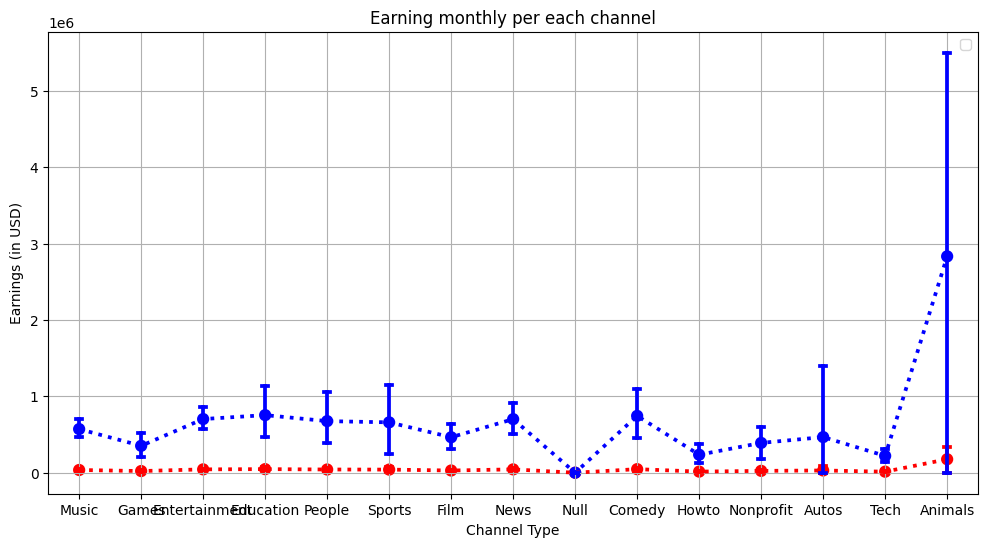

In [59]:
# Membuat point plot dengan x = 'channel_type' dan y = 'Monthly_earnings'
fig, ax = plt.subplots(figsize = (12,6))
ax = [
    sns.pointplot(data=df2, x='channel_type', y='lowest_monthly_earnings', linestyles='dotted', capsize=0.1, color='red'),
    sns.pointplot(data=df2, x='channel_type', y='highest_monthly_earnings', linestyles='dotted', capsize=0.1, color='blue')
    # sns.pointplot(data=df2, x='channel_type', y='lowest_yearly_earnings', linestyles='dotted', capsize=0.1, color='green')
    # sns.pointplot(data=df2, x='channel_type', y='highest_yearly_earnings', linestyles='dotted', capsize=0.1, color='yellow')
]
plt.grid()
plt.legend()
plt.ylabel('Earnings (in USD)')
plt.xlabel('Channel Type')
plt.title('Earning monthly per each channel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Earning yearly per each channel')

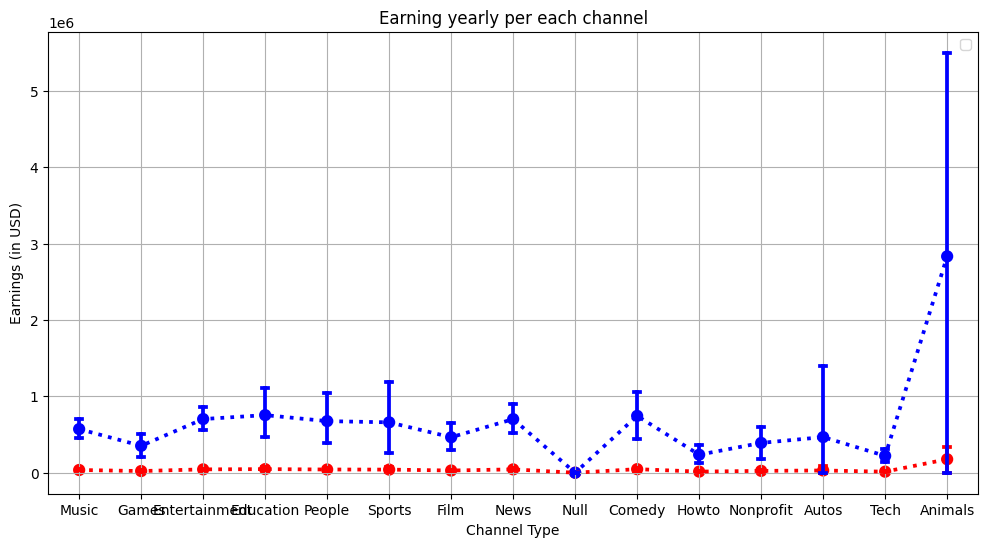

In [60]:
# Membuat point plot dengan x = 'channel_type' dan y = 'Monthly_earnings'
fig, ax = plt.subplots(figsize = (12,6))
ax = [
    sns.pointplot(data=df2, x='channel_type', y='lowest_monthly_earnings', linestyles='dotted', capsize=0.1, color='red'),
    sns.pointplot(data=df2, x='channel_type', y='highest_monthly_earnings', linestyles='dotted', capsize=0.1, color='blue')
    # sns.pointplot(data=df2, x='channel_type', y='lowest_yearly_earnings', linestyles='dotted', capsize=0.1, color='green')
    # sns.pointplot(data=df2, x='channel_type', y='highest_yearly_earnings', linestyles='dotted', capsize=0.1, color='yellow')
]
plt.grid()
plt.legend()
plt.ylabel('Earnings (in USD)')
plt.xlabel('Channel Type')
plt.title('Earning yearly per each channel')